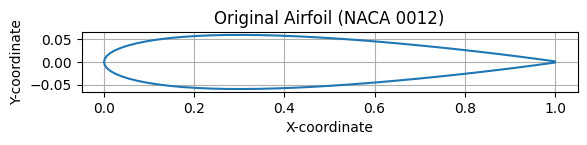

In [1]:
"""Runs an XFOIL analysis for a given airfoil and flow conditions"""
import os
import subprocess
import numpy as np
import pandas as pd
import time
import warnings
%run 2.Hicks_Henne_NEW_Final.ipynb

In [2]:
#Inputs
alpha = 5
Re = 1000000
n_iter = 20

In [3]:
if globals().get('__file__', '') == '':
    # Save the current directory
    original_directory = os.getcwd()
    
    # Navigate to another folder
    os.chdir(original_directory + '\\Deformed_foils')

In [4]:
def Xfoil_runner(alpha, Re, n_iter, airfoil_name):
    
    if os.path.exists("polar_file.txt"):
        os.remove("polar_file.txt")

    input_file = open("input_file.in", 'w')
    input_file.write("LOAD {0}.dat\n".format(airfoil_name))
    input_file.write(airfoil_name + '\n')
#     input_file.write("PANE\nN {0}".format(n_panels))
    input_file.write("PANE\n")
    input_file.write("OPER\n")
    input_file.write("Visc {0}\n".format(Re))
#     input_file.write("Mach {0}\n".format(Mach))
    input_file.write("PACC\n")
    input_file.write("polar_file.txt\n\n")
    input_file.write("ITER {0}\n".format(n_iter))
#     input_file.write("Aseq {0} {1} {2}\n".format(alpha_i,alpha_f,step))
    input_file.write("Alfa {0}\n".format(alpha))
    input_file.write("\n\n")
    input_file.write("quit\n")
    input_file.close()

    subprocess.call(f'xfoil.exe < input_file.in & echo quit', shell=True)

    
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")
        
        # Try to load data from the file
        polar_data = np.loadtxt("polar_file.txt", skiprows=12)

        # Check for the specific UserWarning
        for warning in w:
            if issubclass(warning.category, UserWarning) and "input contained no data" in str(warning.message):
#                 print(f"Warning encountered in iteration {i}: {warning.message}")
                break  # Stop checking for warnings once the relevant one is found
                    
    if len(polar_data)==0:
        return np.nan,np.nan
        
    else:
        return polar_data[1], polar_data[2]

    

In [5]:
def deformed_foil_data_from_Xfoil(alpha, Re, n_iter, num_samples):
    #outputs
    CL = []
    CD = []
    for i in range(num_samples):
        airfoil_name = "Deformed_airfoil_"+str(i)
        cl_i, cd_i = Xfoil_runner(alpha, Re, n_iter, airfoil_name)
        CL.append(cl_i)
        CD.append(cd_i)
        print(i,"-------->",cl_i,cd_i)
    data = {'CL': CL,'CD': CD}
    CL_CD = pd.DataFrame(data)
    CL_CD
    
    # Return to the original directory
    os.chdir(original_directory)
    CL_CD.to_excel('Cl_Cd.xlsx')
    return CL_CD

In [6]:
if globals().get('__file__', '') == '':
    CL_CD = deformed_foil_data_from_Xfoil(alpha, Re, n_iter, num_samples)

0 --------> 0.5294 0.00733
1 --------> 0.6747 0.00947
2 --------> 0.4693 0.00959
3 --------> 0.5034 0.00928
4 --------> 0.6249 0.00916
5 --------> 0.3759 0.00897
6 --------> nan nan
7 --------> 0.6193 0.0078
8 --------> nan nan
9 --------> 0.4217 0.00862
10 --------> 0.4623 0.00919
11 --------> 0.7092 0.0088
12 --------> 0.676 0.00872
13 --------> 0.576 0.01041
14 --------> 0.4666 0.00986
15 --------> 0.4724 0.00907
16 --------> 0.6419 0.00857
17 --------> 0.4837 0.01024
18 --------> 0.6614 0.01014
19 --------> 0.4563 0.00897
20 --------> 0.5525 0.00722
21 --------> 0.5126 0.00869
22 --------> 0.6488 0.00895
23 --------> 0.4382 0.00872
24 --------> 0.5918 0.00784
25 --------> 0.4516 0.00813
26 --------> 0.6858 0.01056
27 --------> 0.4035 0.00821
28 --------> 0.6334 0.00862
29 --------> 0.4084 0.01023
30 --------> 0.5371 0.00812
31 --------> 0.5877 0.00902
32 --------> 0.5784 0.00815
33 --------> 0.4289 0.00881
34 --------> 0.6127 0.01047
35 --------> 0.4925 0.00877
36 --------> 0.4787 